<a href="https://colab.research.google.com/github/Narendra-Singh-shekhawat/NLP-spam-message-classifier/blob/master/nlp_project_spam_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
df=pd.read_csv("/content/drive/My Drive/dataset/smsspamcollection/SMSSpamCollection",sep="\t",names=["labels","messages"])

In [ ]:
df

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()


In [ ]:
len(df["messages"])

5572

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus=[]
for i in range(len(df["messages"])):
  message=re.sub("[^a-zA-Z]"," ",df["messages"][i])
  message=message.lower()
  message=message.split()
  message=[wordnet.lemmatize(word) for word in message if not word in set(stopwords.words("english"))]
  message=" ".join(message)
  corpus.append(message)

In [ ]:
corpus[0:10]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free']

Creating with bag of words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X.shape

(5572, 5000)

In [ ]:
X.ndim

2

In [ ]:
y=pd.get_dummies(df["labels"])

In [ ]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
y=y.iloc[:,1].values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
LR=LogisticRegression()
NB=MultinomialNB()
DT=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=10,random_state=0)
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=0)
DT_bag=BaggingClassifier(n_estimators=10,random_state=0)
#boosting models
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=15,random_state=0)
DT_boost=AdaBoostClassifier(base_estimator=DT,n_estimators=15,random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=15,random_state=0)
NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=15,random_state=0)

In [ ]:
models=[]
models.append(("Logistic",LR))
models.append(("multinomalNB",NB))
models.append(("DT",DT))
models.append(('RF',RF))
models.append(('BaggedLR',LR_bag))
models.append(("BaggedNB",NB_bag))
models.append(("BaggedDT",DT_bag))
models.append(("BoostLR",LR_boost))
models.append(("BoostDT",DT_boost))
models.append(("BoostRF",RF_boost))
models.append(("BoostNB",NB_boost))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,y,cv = kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('NAME: {} ----- MEAN: {} ----- VAR: {} '.format(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

NAME: Logistic ----- MEAN: 0.9889864978715971 ----- VAR: 2.672539594001681e-05 
NAME: multinomalNB ----- MEAN: 0.9849249829031042 ----- VAR: 1.2281959913519125e-05 
NAME: DT ----- MEAN: 0.9024973922847365 ----- VAR: 0.0002335896334235359 
NAME: RF ----- MEAN: 0.9786930225561447 ----- VAR: 2.840032083396591e-05 
NAME: BaggedLR ----- MEAN: 0.9891038927179286 ----- VAR: 2.5744421727039676e-05 
NAME: BaggedNB ----- MEAN: 0.9857783349813216 ----- VAR: 1.3649315080701151e-05 
NAME: BaggedDT ----- MEAN: 0.9629014986074163 ----- VAR: 2.920969033174767e-05 
NAME: BoostLR ----- MEAN: 0.980038277527572 ----- VAR: 3.0425901690932743e-05 
NAME: BoostDT ----- MEAN: 0.9547726564490286 ----- VAR: 5.057569071906944e-05 
NAME: BoostRF ----- MEAN: 0.9887988351561608 ----- VAR: 1.4307765855797602e-06 
NAME: BoostNB ----- MEAN: 0.982595925825772 ----- VAR: 2.768704537022977e-05 


In [ ]:
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,bartlett,wilcoxon,mannwhitneyu,chi2_contingency
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

Logistic
Here is our mean accuracy on the test set:
 0.981
Here is our mean accuracy on the train set:
 0.994


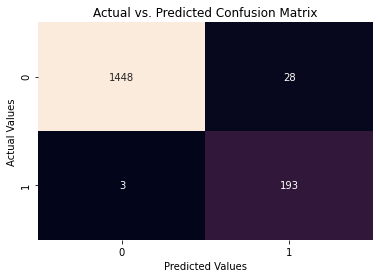


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.98      0.87      0.93       221

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

--------------------------------------------------------

multinomalNB
Here is our mean accuracy on the test set:
 0.986
Here is our mean accuracy on the train set:
 0.991


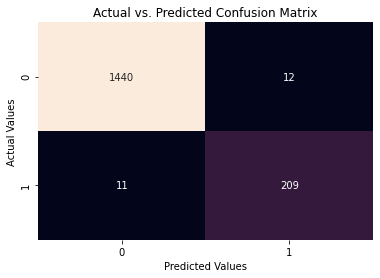


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.95      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

--------------------------------------------------------

DT
Here is our mean accuracy on the test set:
 0.948
Here is our mean accuracy on the train set:
 0.948


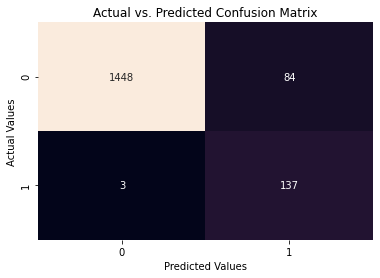


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1451
           1       0.98      0.62      0.76       221

    accuracy                           0.95      1672
   macro avg       0.96      0.81      0.86      1672
weighted avg       0.95      0.95      0.94      1672

--------------------------------------------------------

RF
Here is our mean accuracy on the test set:
 0.971
Here is our mean accuracy on the train set:
 0.997


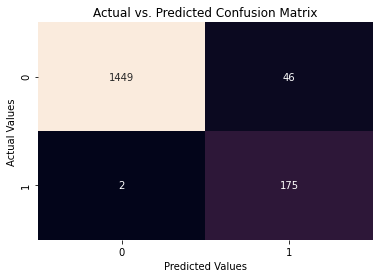


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1451
           1       0.99      0.79      0.88       221

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

--------------------------------------------------------

BaggedLR
Here is our mean accuracy on the test set:
 0.980
Here is our mean accuracy on the train set:
 0.990


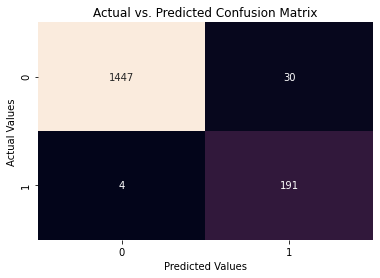


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.98      0.86      0.92       221

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

--------------------------------------------------------

BaggedNB
Here is our mean accuracy on the test set:
 0.986
Here is our mean accuracy on the train set:
 0.990


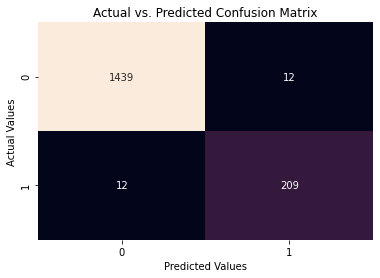


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.95      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

--------------------------------------------------------

BaggedDT
Here is our mean accuracy on the test set:
 0.972
Here is our mean accuracy on the train set:
 0.995


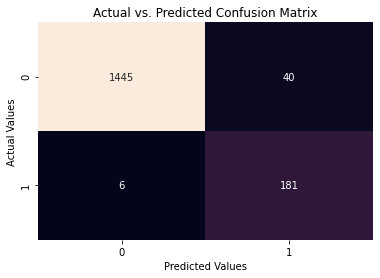


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1451
           1       0.97      0.82      0.89       221

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

--------------------------------------------------------

BoostLR
Here is our mean accuracy on the test set:
 0.905
Here is our mean accuracy on the train set:
 0.905


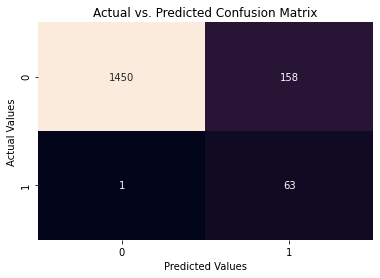


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1451
           1       0.98      0.29      0.44       221

    accuracy                           0.90      1672
   macro avg       0.94      0.64      0.70      1672
weighted avg       0.91      0.90      0.88      1672

--------------------------------------------------------

BoostDT
Here is our mean accuracy on the test set:
 0.961
Here is our mean accuracy on the train set:
 1.000


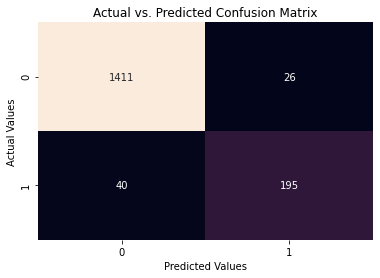


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1451
           1       0.83      0.88      0.86       221

    accuracy                           0.96      1672
   macro avg       0.91      0.93      0.92      1672
weighted avg       0.96      0.96      0.96      1672

--------------------------------------------------------

BoostRF
Here is our mean accuracy on the test set:
 0.987
Here is our mean accuracy on the train set:
 1.000


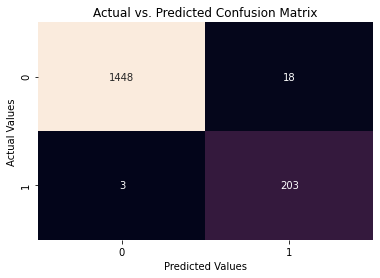


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1451
           1       0.99      0.92      0.95       221

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

--------------------------------------------------------

BoostNB
Here is our mean accuracy on the test set:
 0.941
Here is our mean accuracy on the train set:
 0.949


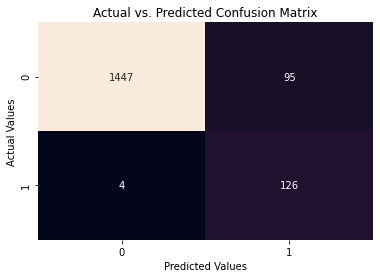


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1451
           1       0.97      0.57      0.72       221

    accuracy                           0.94      1672
   macro avg       0.95      0.78      0.84      1672
weighted avg       0.94      0.94      0.93      1672

--------------------------------------------------------



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

for name,model in models:
  print(name)
  model.fit(x_train,y_train)
  y_predict_LR=model.predict(x_test)
  accuracy_test =model.score(x_test,y_test)

  print("Here is our mean accuracy on the test set:\n {0:.3f}"\
        .format(accuracy_test))
  accuracy_train =model.score(x_train,y_train)

  print("Here is our mean accuracy on the train set:\n {0:.3f}"\
        .format(accuracy_train))
  confusion = metrics.confusion_matrix( y_predict_LR, y_test )
  sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Actual vs. Predicted Confusion Matrix')
  plt.show()
  print()
  print('CLASSIFICATION REPORT',classification_report(y_test, y_predict_LR))
  print('--------------------------------------------------------')
  print()